In [24]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
msft_df = pd.read_pickle('msft_merged.pickle')

In [26]:
df = msft_df
df = df.drop(columns= ['LastPrice', 'Symbol', 'Volume', 'OpenInterest', 'Volume'])



In [27]:
df['ExpirationDate'] =  pd.to_datetime(df['ExpirationDate'], infer_datetime_format=True)
df['DataDate'] =  pd.to_datetime(df['DataDate'], infer_datetime_format=True)
df['delta'] = df['ExpirationDate'] - df['DataDate']

df['exp?'] =df['ExpirationDate'] ==df['DataDate']
df['long_close'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.1) & (df['% out'] < 0))
df['long_medium'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.2) & (df['% out'] < -.1))
df['long_far'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.3) & (df['% out'] < -.2))
df['short_close'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.1) & (df['% out'] < 0))
df['short_medium'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.2) & (df['% out'] < -.1))
df['short_far'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.3) & (df['% out'] < -.2))

pd.set_option('display.max_columns', 30)

In [28]:
df_table=df.loc[:, ['OptionKey', 'BidPrice']]
df_table=df_table.reset_index()
df_table.columns=['PriceDate', 'OptionKey', 'RebuyPrice']
df_table['RebuyPrice'].nunique()

416

In [29]:
xp = df
xp.loc[xp['exp?']== True, 'xp' ] = xp.loc[df['exp?'] == True, 'AskPrice']
xp = xp.loc[xp['exp?']== True]
xp= xp[['OptionKey', 'xp']]
xp

,OptionKey,xp
2019-11-15,MSFT2019-11-15P125.00,0.01
2019-11-15,MSFT2019-11-15P127.00,0.01
2019-11-15,MSFT2019-11-15P129.00,0.45
2019-11-15,MSFT2019-11-15P130.00,0.01
2019-11-15,MSFT2019-11-15P131.00,0.03
...,...,...
2019-12-13,MSFT2019-12-13P150.00,0.01
2019-12-13,MSFT2019-12-13P152.50,0.01
2019-12-13,MSFT2019-12-13P155.00,0.68
2019-12-13,MSFT2019-12-13P157.50,3.85


In [30]:
df['xp']=df.OptionKey.map(xp.set_index('OptionKey')['xp'])
df

,OptionKey,ExpirationDate,AskPrice,BidPrice,PutCall,StrikePrice,UnderlyingPrice,DataDate,time delta,% out,LSTM Predicted Signal,RF Predicted Value,LSTM OTM Cr Entry,RF OTM Cr Entry,Bid Price,delta,exp?,long_close,long_medium,long_far,short_close,short_medium,short_far,xp
2019-11-13,MSFT2019-11-15P120.00,2019-11-15,0.01,0.00,put,120.0,147.31,2019-11-13,2 days,-0.185391,1,1,0,0,0.0,2 days,False,False,True,False,False,True,False,NaN
2019-11-13,MSFT2019-11-15P125.00,2019-11-15,0.01,0.00,put,125.0,147.31,2019-11-13,2 days,-0.151449,1,1,0,0,0.0,2 days,False,False,True,False,False,True,False,0.01
2019-11-14,MSFT2019-11-15P125.00,2019-11-15,0.01,0.00,put,125.0,148.06,2019-11-14,1 days,-0.155748,1,1,0,0,0.0,1 days,False,False,True,False,False,True,False,0.01
2019-11-15,MSFT2019-11-15P125.00,2019-11-15,0.01,0.00,put,125.0,149.97,2019-11-15,0 days,-0.166500,1,1,0,0,0.0,0 days,True,False,True,False,False,True,False,0.01
2019-11-14,MSFT2019-11-15P127.00,2019-11-15,0.01,0.00,put,127.0,148.06,2019-11-14,1 days,-0.142240,1,1,0,0,0.0,1 days,False,False,True,False,False,True,False,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,MSFT2019-12-27P162.50,2019-12-27,13.60,12.30,put,162.5,149.55,2019-12-02,25 days,0.086593,-1,1,0,1,1230.0,25 days,False,False,False,False,False,False,False,NaN
2019-12-13,MSFT2019-12-27P162.50,2019-12-27,10.15,6.45,put,162.5,154.53,2019-12-13,14 days,0.051576,1,1,1,1,645.0,14 days,False,False,False,False,False,False,False,NaN
2019-11-19,MSFT2019-12-27P170.00,2019-12-27,21.70,18.15,put,170.0,150.39,2019-11-19,38 days,0.130394,-1,1,0,1,1815.0,38 days,False,False,False,False,False,False,False,NaN
2019-11-20,MSFT2019-12-27P170.00,2019-12-27,22.25,19.45,put,170.0,149.62,2019-11-20,37 days,0.136212,-1,1,0,1,1945.0,37 days,False,False,False,False,False,False,False,NaN


In [37]:
short_close_LSTM = df.loc[(df['short_close']== True) & (df['LSTM Predicted Signal'] == 1)]
short_close_LSTM['log'] = short_close_LSTM['AskPrice'] - short_close_LSTM['xp']
short_close_LSTM_total = short_close_LSTM['log'].sum()
print(short_close_LSTM_total)

8.080000000000002


<ipython-input-37-1d9b8a5588f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_close_LSTM['log'] = short_close_LSTM['AskPrice'] - short_close_LSTM['xp']


In [38]:
short_close_RF = df.loc[(df['short_close']== True) & (df['RF Predicted Value'] == 1)]
short_close_RF['log'] = short_close_RF['AskPrice'] - short_close_RF['xp']
short_close_RF_total = short_close_RF['log'].sum()
print(short_close_RF_total)

26.919999999999998


<ipython-input-38-26e370e263bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_close_RF['log'] = short_close_RF['AskPrice'] - short_close_RF['xp']


In [39]:
short_medium_LSTM = df.loc[(df['short_medium']== True) & (df['LSTM Predicted Signal'] == 1)]
short_medium_LSTM['log'] = short_medium_LSTM['AskPrice'] - short_medium_LSTM['xp']
short_medium_LSTM_total = short_medium_LSTM['log'].sum()
print(short_medium_LSTM_total)

-0.019999999999999907


<ipython-input-39-47cc65b57caf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_medium_LSTM['log'] = short_medium_LSTM['AskPrice'] - short_medium_LSTM['xp']


In [40]:
short_medium_RF = df.loc[(df['short_medium']== True) & (df['RF Predicted Value'] == 1)]
short_medium_RF['log'] = short_medium_RF['AskPrice'] - short_medium_RF['xp']
short_medium_RF_total = short_medium_RF['log'].sum()
print(short_medium_RF_total)

0.010000000000000009


<ipython-input-40-3e62de6047f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_medium_RF['log'] = short_medium_RF['AskPrice'] - short_medium_RF['xp']


In [41]:
short_far_LSTM = df.loc[(df['short_far']== True) & (df['LSTM Predicted Signal'] == 1)]
short_far_LSTM['log'] = short_far_LSTM['AskPrice'] - short_far_LSTM['xp']
short_far_LSTM_total = short_far_LSTM['log'].sum()
print(short_far_LSTM_total)

0.0


<ipython-input-41-97cde8b08bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_far_LSTM['log'] = short_far_LSTM['AskPrice'] - short_far_LSTM['xp']


In [42]:
short_far_RF = df.loc[(df['short_far']== True) & (df['RF Predicted Value'] == 1)]
short_far_RF['log'] = short_far_RF['AskPrice'] - short_far_RF['xp']
short_far_RF_total = short_far_RF['log'].sum()
print(short_far_RF_total)

0.0


<ipython-input-42-18c5042b77ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_far_RF['log'] = short_far_RF['AskPrice'] - short_far_RF['xp']


In [43]:
long_close_LSTM = df.loc[(df['long_close']== True) & (df['LSTM Predicted Signal'] == 1)]
long_close_LSTM['log'] = long_close_LSTM['AskPrice'] - long_close_LSTM['xp']
long_close_LSTM_total = long_close_LSTM['log'].sum()
print(long_close_LSTM_total)

17.96


<ipython-input-43-14bc539d4f68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_close_LSTM['log'] = long_close_LSTM['AskPrice'] - long_close_LSTM['xp']


In [44]:
long_close_RF = df.loc[(df['long_close']== True) & (df['RF Predicted Value'] == 1)]
long_close_RF['log'] = long_close_RF['AskPrice'] - long_close_RF['xp']
long_close_RF_total = long_close_RF['log'].sum()
print(long_close_RF_total)

72.93


<ipython-input-44-2c96faa3b979>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_close_RF['log'] = long_close_RF['AskPrice'] - long_close_RF['xp']


In [45]:
long_far_RF = df.loc[(df['long_far']== True) & (df['RF Predicted Value'] == 1)]
long_far_RF['log'] = long_far_RF['AskPrice'] - long_far_RF['xp']
long_far_RF_total = long_far_RF['log'].sum()
print(long_far_RF_total)

0.0


<ipython-input-45-42ba9debbf05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_far_RF['log'] = long_far_RF['AskPrice'] - long_far_RF['xp']


In [46]:
long_far_LSTM = df.loc[(df['long_far']== True) & (df['LSTM Predicted Signal'] == 1)]
long_far_LSTM['log'] = long_far_LSTM['AskPrice'] - long_far_LSTM['xp']
long_far_LSTM_total = long_far_LSTM['log'].sum()
print(long_far_LSTM_total)

0.0


<ipython-input-46-ded057f9d0d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_far_LSTM['log'] = long_far_LSTM['AskPrice'] - long_far_LSTM['xp']


In [47]:
long_medium_LSTM = df.loc[(df['long_medium']== True) & (df['LSTM Predicted Signal'] == 1)]
long_medium_LSTM['log'] = long_medium_LSTM['AskPrice'] - long_medium_LSTM['xp']
long_medium_LSTM_total = long_medium_LSTM['log'].sum()
print(long_medium_LSTM_total)

0.24000000000000007


<ipython-input-47-e86d80339e6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_medium_LSTM['log'] = long_medium_LSTM['AskPrice'] - long_medium_LSTM['xp']


In [48]:
long_medium_RF = df.loc[(df['long_medium']== True) & (df['RF Predicted Value'] == 1)]
long_medium_RF['log'] = long_medium_RF['AskPrice'] - long_medium_RF['xp']
long_medium_RF_total = long_medium_RF['log'].sum()
print(long_medium_RF_total)

0.4900000000000001


<ipython-input-48-29d39dcc6c84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_medium_RF['log'] = long_medium_RF['AskPrice'] - long_medium_RF['xp']


In [49]:
df = pd.DataFrame()
df['short_close_negatives_RF'] =(short_close_RF.log[(short_close_RF.log < 0)]).count(),
df['short_close_positives_RF'] =(short_close_RF.log[(short_close_RF.log > 0)]).count(),

df['short_close_negatives_LSTM'] =(short_close_LSTM.log[(short_close_LSTM.log < 0)]).count(),
df['short_close_positives_LSTM'] =(short_close_LSTM.log[(short_close_LSTM.log > 0)]).count(),

df['short_medium_negatives_RF'] =(short_medium_RF.log[(short_medium_RF.log < 0)]).count(),
df['short_medium_positives_RF'] =(short_medium_RF.log[(short_medium_RF.log > 0)]).count(),

df['short_medium_negatives_LSTM'] =(short_medium_LSTM.log[(short_medium_LSTM.log < 0)]).count(),
df['short_medium_positives_LSTM'] =(short_medium_LSTM.log[(short_medium_LSTM.log > 0)]).count(),

df['short_far_negatives_RF'] =(short_far_RF.log[(short_far_RF.log < 0)]).count(),
df['short_far_positives_RF'] =(short_far_RF.log[(short_far_RF.log > 0)]).count(),

df['short_far_negatives_LSTM'] =(short_far_LSTM.log[(short_far_LSTM.log < 0)]).count(),
df['short_far_positives_LSTM'] =(short_far_LSTM.log[(short_far_LSTM.log > 0)]).count()


<AxesSubplot:title={'center':'Positive vs Negative Count over Short Expiration Window (weekly)'}>

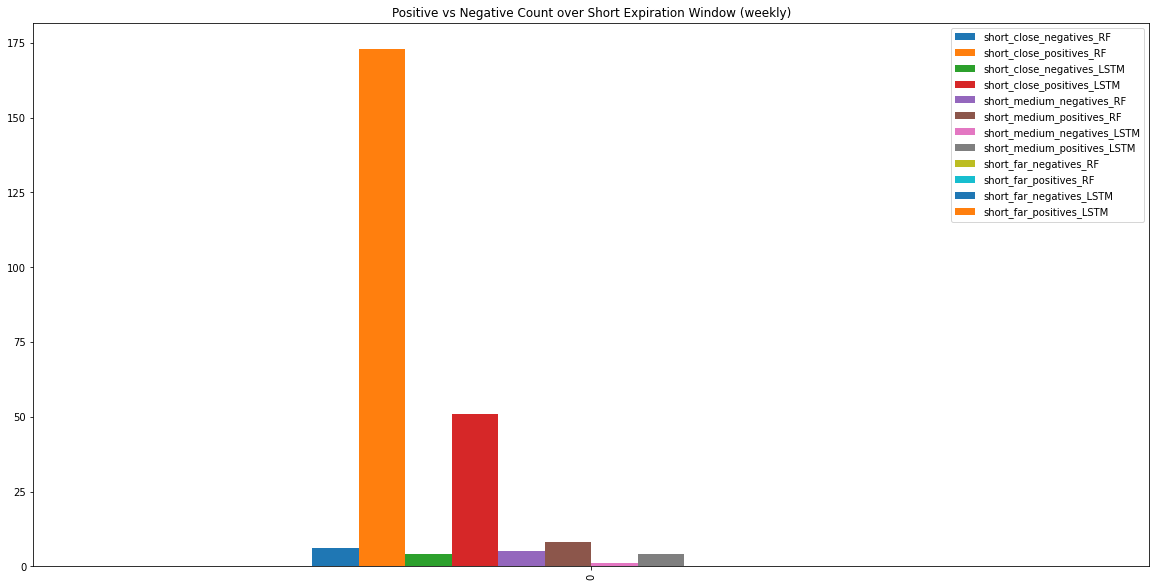

In [50]:
df.plot(kind = 'bar', figsize = (20,10), title = "Positive vs Negative Count over Short Expiration Window (weekly)")

In [51]:
lf = pd.DataFrame()
lf['long_close_negatives_RF'] =(long_close_RF.log[(long_close_RF.log < 0)]).count(),
lf['long_close_positives_RF'] =(long_close_RF.log[(long_close_RF.log > 0)]).count(),

lf['long_close_negatives_LSTM'] =(long_close_LSTM.log[(long_close_LSTM.log < 0)]).count(),
lf['long_close_positives_LSTM'] =(long_close_LSTM.log[(long_close_LSTM.log > 0)]).count(),

lf['long_medium_negatives_RF'] =(long_medium_RF.log[(long_medium_RF.log < 0)]).count(),
lf['long_medium_positives_RF'] =(long_medium_RF.log[(long_medium_RF.log > 0)]).count(),

lf['long_medium_negatives_LSTM'] =(long_medium_LSTM.log[(long_medium_LSTM.log < 0)]).count(),
lf['long_medium_positives_LSTM'] =(long_medium_LSTM.log[(long_medium_LSTM.log > 0)]).count(),

lf['long_far_negatives_RF'] =(long_far_RF.log[(long_far_RF.log < 0)]).count(),
lf['long_far_positives_RF'] =(long_far_RF.log[(long_far_RF.log > 0)]).count(),

lf['long_far_negatives_LSTM'] =(long_far_LSTM.log[(long_far_LSTM.log < 0)]).count(),
lf['long_far_positives_LSTM'] =(long_far_LSTM.log[(long_far_LSTM.log > 0)]).count()

<AxesSubplot:title={'center':'Positive vs Negative Count over Short Expiration Window (bi-weekly)'}>

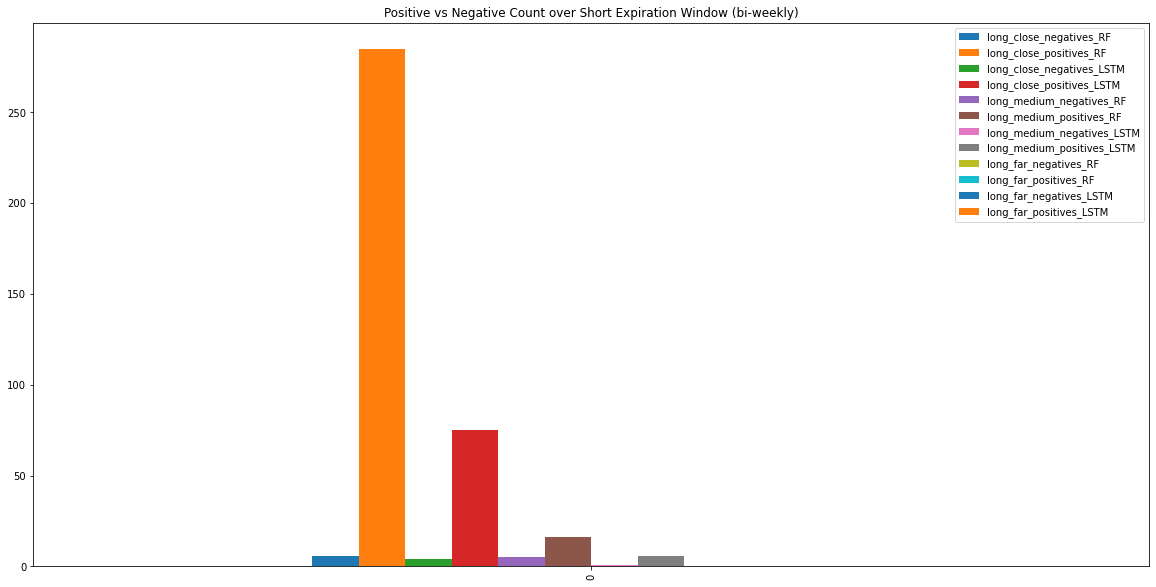

In [52]:
lf.plot(kind = 'bar', figsize = (20,10), title = "Positive vs Negative Count over Short Expiration Window (bi-weekly)")

In [53]:
short_equity_curve = pd.DataFrame()
short_equity_curve['short_close_RF_group'] = short_close_RF['log'].groupby(short_close_RF.index).sum()
short_equity_curve['short_close_RF_group'] = short_close_LSTM['log'].groupby(short_close_LSTM.index).sum()
short_equity_curve['short_medium_RF_group'] = short_medium_RF['log'].groupby(short_medium_RF.index).sum()
short_equity_curve['short_medium_LSTM_group'] = short_medium_LSTM['log'].groupby(short_medium_LSTM.index).sum()
short_equity_curve['short_far_RF_group'] = short_far_RF['log'].groupby(short_far_RF.index).sum()
short_equity_curve['short_far_LSTM_group'] = short_far_LSTM['log'].groupby(short_far_LSTM.index).sum()

In [54]:
short_equity_curve = short_equity_curve.cumsum()
short_equity_curve = short_equity_curve.fillna(method = 'backfill' )
short_equity_curve

,short_close_RF_group,short_medium_RF_group,short_medium_LSTM_group,short_far_RF_group,short_far_LSTM_group
2019-11-13,1.33,0.03,0.03,0.0,0.0
2019-11-14,2.34,-0.34,-0.34,0.0,0.0
2019-11-15,6.53,-0.02,-0.02,0.0,0.0
2019-11-18,7.08,-0.04,-0.02,0.0,0.0
2019-11-19,7.08,-0.08,-0.02,0.0,0.0
2019-11-20,7.08,-0.05,-0.02,0.0,0.0
2019-11-21,7.08,-0.07,-0.02,0.0,0.0
2019-11-22,7.08,-0.07,-0.02,0.0,0.0
2019-11-26,7.08,-0.07,-0.02,0.0,0.0
2019-11-27,7.08,-0.07,-0.02,0.0,0.0


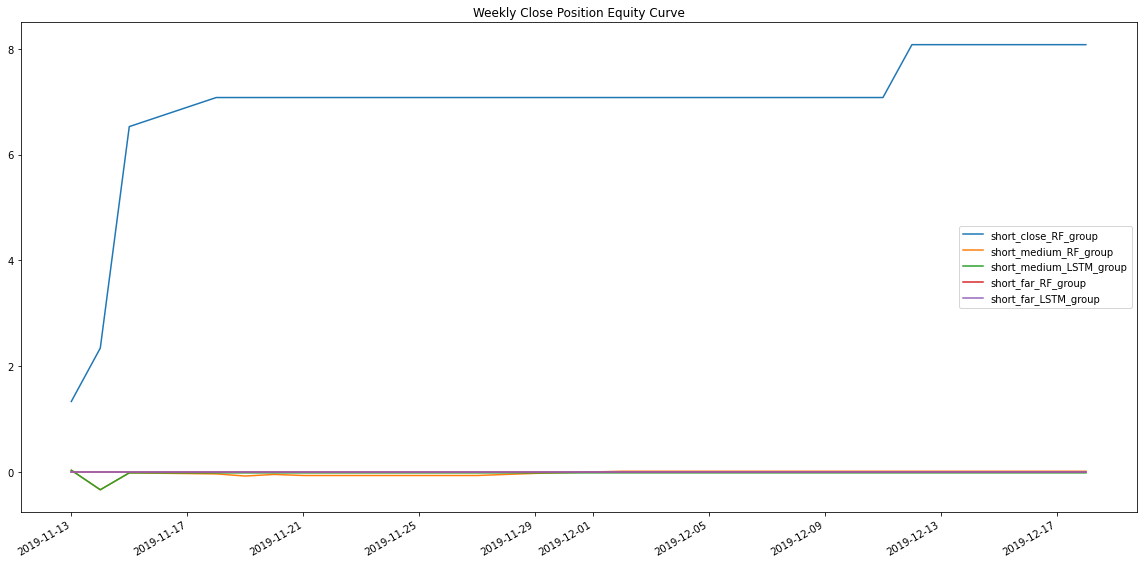

In [68]:
se=short_equity_curve.plot(kind ='line', figsize = (20,10),title ="Weekly Close Position Equity Curve").get_figure()

In [70]:
se.savefig('msft_short_equity_curve')

In [56]:
long_equity_curve = pd.DataFrame()
long_equity_curve['long_close_RF_group'] = long_close_RF['log'].groupby(long_close_RF.index).sum()
long_equity_curve['long_close_LSTM_group'] =long_close_LSTM['log'].groupby(long_close_LSTM.index).sum()
long_equity_curve['long_medium_RF_group'] = long_medium_RF['log'].groupby(long_medium_RF.index).sum()
long_equity_curve['long_medium_LSTM_group'] = long_medium_LSTM['log'].groupby(long_medium_LSTM.index).sum()
long_equity_curve['long_far_RF_group'] = long_far_RF['log'].groupby(long_far_RF.index).sum()
long_equity_curve['long_far_LSTM_group'] = long_far_LSTM['log'].groupby(long_far_LSTM.index).sum()

In [57]:
long_equity_curve = long_equity_curve.cumsum()
long_equity_curve = long_equity_curve.fillna(method = 'backfill' )
long_equity_curve

,long_close_RF_group,long_close_LSTM_group,long_medium_RF_group,long_medium_LSTM_group,long_far_RF_group,long_far_LSTM_group
2019-11-13,5.90,5.90,0.03,0.03,0.0,0.0
2019-11-14,12.22,12.22,-0.08,-0.08,0.0,0.0
2019-11-15,16.41,16.41,0.24,0.24,0.0,0.0
2019-11-18,23.75,16.96,0.25,0.24,0.0,0.0
2019-11-19,31.26,16.96,0.27,0.24,0.0,0.0
2019-11-20,37.41,16.96,0.30,0.24,0.0,0.0
2019-11-21,42.05,16.96,0.28,0.24,0.0,0.0
2019-11-22,44.20,16.96,0.28,0.24,0.0,0.0
2019-11-26,47.86,16.96,0.35,0.24,0.0,0.0
2019-11-27,50.05,16.96,0.41,0.24,0.0,0.0


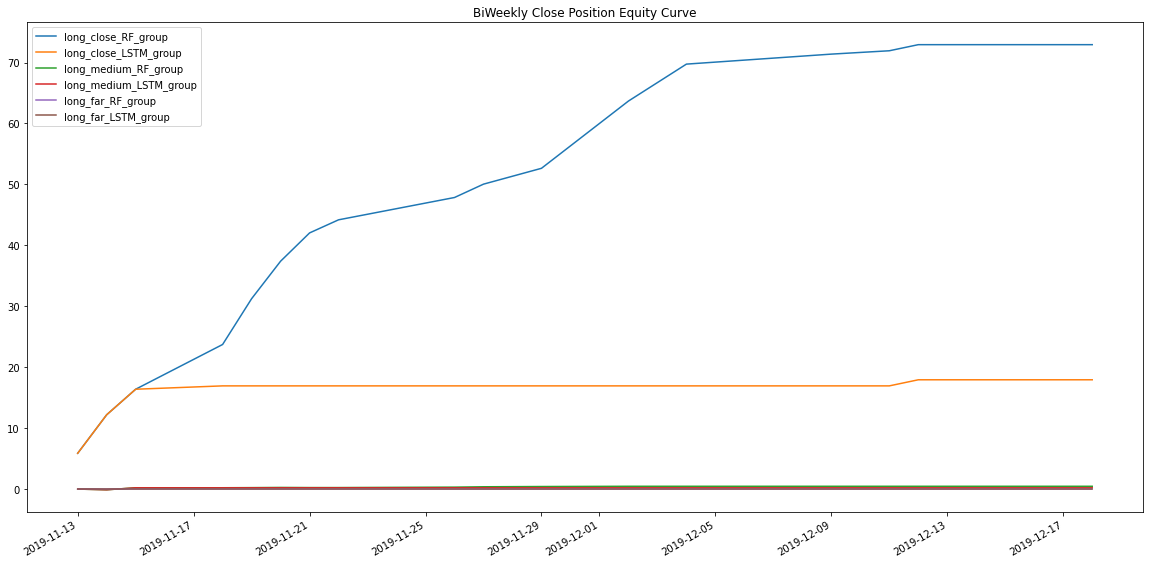

In [69]:
le = long_equity_curve.plot(kind ='line', figsize = (20,10), title ="BiWeekly Close Position Equity Curve").get_figure()

In [71]:
le.savefig('msft_long_equity_curve')

In [59]:
print(f'the biggest loses were', short_close_RF_total)

the biggest loses were 26.919999999999998


In [60]:
print('Selling options expiring in a week and close to the money,\n RF generated:', short_close_RF_total, '\n LSTM generated:', short_close_LSTM_total)
print('\nSelling options expiring in a week and slightly out to the money,\n RF generated:', short_medium_RF_total, '\n LSTM generated:', short_medium_LSTM_total)
print('\nSelling options expiring in a week and far out to the money,\n RF generated:', short_far_RF_total, '\n LSTM generated:', short_far_LSTM_total)


Selling options expiring in a week and close to the money,
 RF generated: 26.919999999999998 
 LSTM generated: 8.080000000000002

Selling options expiring in a week and slightly out to the money,
 RF generated: 0.010000000000000009 
 LSTM generated: -0.019999999999999907

Selling options expiring in a week and far out to the money,
 RF generated: 0.0 
 LSTM generated: 0.0


In [61]:
print('Selling options expiring in a two weeks and close to the money,\n RF generated:', long_close_RF_total, '\n LSTM generated:', long_close_LSTM_total)
print('\nSelling options expiring in two weeks and slightly out to the money,\n RF generated:', long_medium_RF_total, '\n LSTM generated:', long_medium_LSTM_total)
print('\nSelling options expiring in two weeks and far out to the money,\n RF generated:', long_far_RF_total, '\n LSTM generated:', long_far_LSTM_total)


Selling options expiring in a two weeks and close to the money,
 RF generated: 72.93 
 LSTM generated: 17.96

Selling options expiring in two weeks and slightly out to the money,
 RF generated: 0.4900000000000001 
 LSTM generated: 0.24000000000000007

Selling options expiring in two weeks and far out to the money,
 RF generated: 0.0 
 LSTM generated: 0.0


In [72]:
merged = short_equity_curve.merge(long_equity_curve, left_index = True, right_index =True)

<AxesSubplot:>

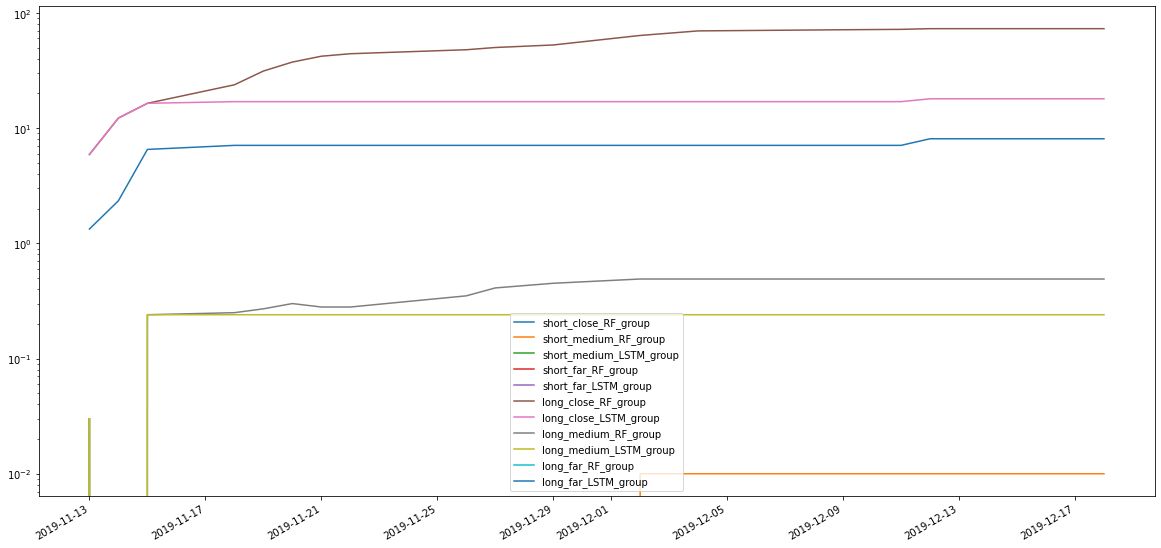

In [75]:
merged.plot(logy=True, figsize = (20,10))

In [79]:
#max DD calculation
maxDDLE = 0

for (columnName, columnData) in long_equity_curve.iteritems():
    for x in columnData:
        if x < maxDDLE:
            maxDDLE = x

maxDDSE = 0

for (columnName, columnData) in short_equity_curve.iteritems():
    for x in columnData:
        if x < maxDDSE:
            maxDDSE = x
            
print(f'Short window max DD {maxDDSE}')            
print(f'Long window max DD {maxDDLE}')

Short window max DD -0.33999999999999997
Long window max DD -0.07999999999999996
